<a href="https://colab.research.google.com/github/kiplangat-david/Intelligent-Forecasting-Challenge/blob/main/Capstone_Project_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Data Analytic Question

The Main goal of this project is  to therefore build  a model that  predicts consumption for 11 contraceptives across 156 health service delivery sites in the public sector health system in Côte d’Ivoire. The predictions are to be made monthly from October to December 2019.

### b) Defining the Metric for Success
Our project will be considered a success if we're able to develop a model with the lowest  RMSE.

### c) Understanding the context 
Contraceptive utilization is the practice that helps individuals or couples avoid unwanted pregnancy. Beyond preventing unwanted pregnancy, contraceptive access is vital to safe motherhood and prosperous communities.  
It is important that contraceptives are widely available and easily accessible to anyone who is sexually active. According to the UN Contraceptive use by method 2019 Data Booklet  Africa has by far the lowest percentage of women using contraceptives. To be specific, 214 million women of reproductive age in developing regions have an unmet need for contraception. 

One of the main reasons for limited access is that health systems in these countries are unable to predict the quantity of contracept
and family planning. When too much product is ordered, unused contraceptives are wasted and left to expire. 
Accurate forecasting of contraceptive consumption can save lives, money, and time by ensuring health service delivery sites have what they need when they need it and by reducing waste in the supply chain.

### d) Recording the Experimental Design
1. Data Preparation
 - Loading Dependencies
 - Loading the Dataset
 - Dealing with Irrelevant Observations
 - Handling missing/duplicate values
 - Data Uniformity
 - Checking Outliers
3. Exploratory Data Analysis
 - Univariate analysis
 - Bivariate analysis
4. Modelling
 - Feature Engineering
 - Instantiating the Classifiers
 - Performance evaluation
 - Hyperparameter optimization
5. Performance Analysis
 - Assessing scores
6. Conclusions and Recommendations

### e) Data Relevance

Train Dataset is our main dataset.

Description of the variables in the primary dataset are as follows:

*  **Year**: year of the observation
*  **Month**: month of the observation
*  **Region**: higher level geographical area within Côte d'Ivoire
*  **District**: lower level geographical area within Côte d'Ivoire
*  **Site_code**: actual health service delivery site
*  **Product_code**: unique identifier for each commodity
*  **Stock_initial**: stock in hand of previous period. This is quantified in dispensing units
*  **Stock_received**: total quantity received in the last period. This is quantified in dispensing units
*  **Stock_distributed**{Target Variable}: quantity dispensed/consumed in the last reporting period. This is quantified in dispensing units
*  **Stock_adjustment**: all kinds of losses/ adjustments made at the facility
*  **Stock_end**: current physical count of stock in hand. This is quantified in dispensing units
*  **Average_monthly_consumption**: average monthly consumption for the last three months. This is quantified in dispensing units
*  **Stock_stockout_days**: total number of days facility was out of stock
*  **Stock_ordered**: the requested quantity. This is quantified in dispensing units.

## 2. Reading the Data

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the Datasets from the source i.e. csv
train = pd.read_csv('Train.csv')
annual_data = pd.read_csv('annual_cases.csv')
mon_data = pd.read_csv('monthly_cases.csv')
prod_data = pd.read_csv('product.csv')
serv_data = pd.read_csv('service_delivery_site_data.csv')



## 3. Checking the Data

#### Train Dataset

In [ ]:
# Determining the no. of records in our dataset(Train_data)
#
train.shape

(35753, 14)

In [ ]:
# Previewing the top of our dataset
#
train.head()

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
0,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,75,0,21,-54,0,18,0,100.0
1,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27132,3,0,3,0,0,2,0,10.0
2,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27000,0,75,22,0,53,9,0,0.0
3,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27137,2,0,0,0,2,0,0,0.0
4,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27138,45,0,2,0,43,1,0,0.0


In [ ]:
# Checking whether each column has an appropriate datatype
#
train.dtypes

year                             int64
month                            int64
region                          object
district                        object
site_code                       object
product_code                    object
stock_initial                    int64
stock_received                   int64
stock_distributed                int64
stock_adjustment                 int64
stock_end                        int64
average_monthly_consumption      int64
stock_stockout_days              int64
stock_ordered                  float64
dtype: object

In [ ]:
#Checking for duplicates 
train.duplicated().sum()

0

In [ ]:
#Checking for missing values 
train.isnull().sum()

year                             0
month                            0
region                           0
district                         0
site_code                        0
product_code                     0
stock_initial                    0
stock_received                   0
stock_distributed                0
stock_adjustment                 0
stock_end                        0
average_monthly_consumption      0
stock_stockout_days              0
stock_ordered                  763
dtype: int64

In [ ]:
#Dealing with missing values 
train.dropna(inplace= True)

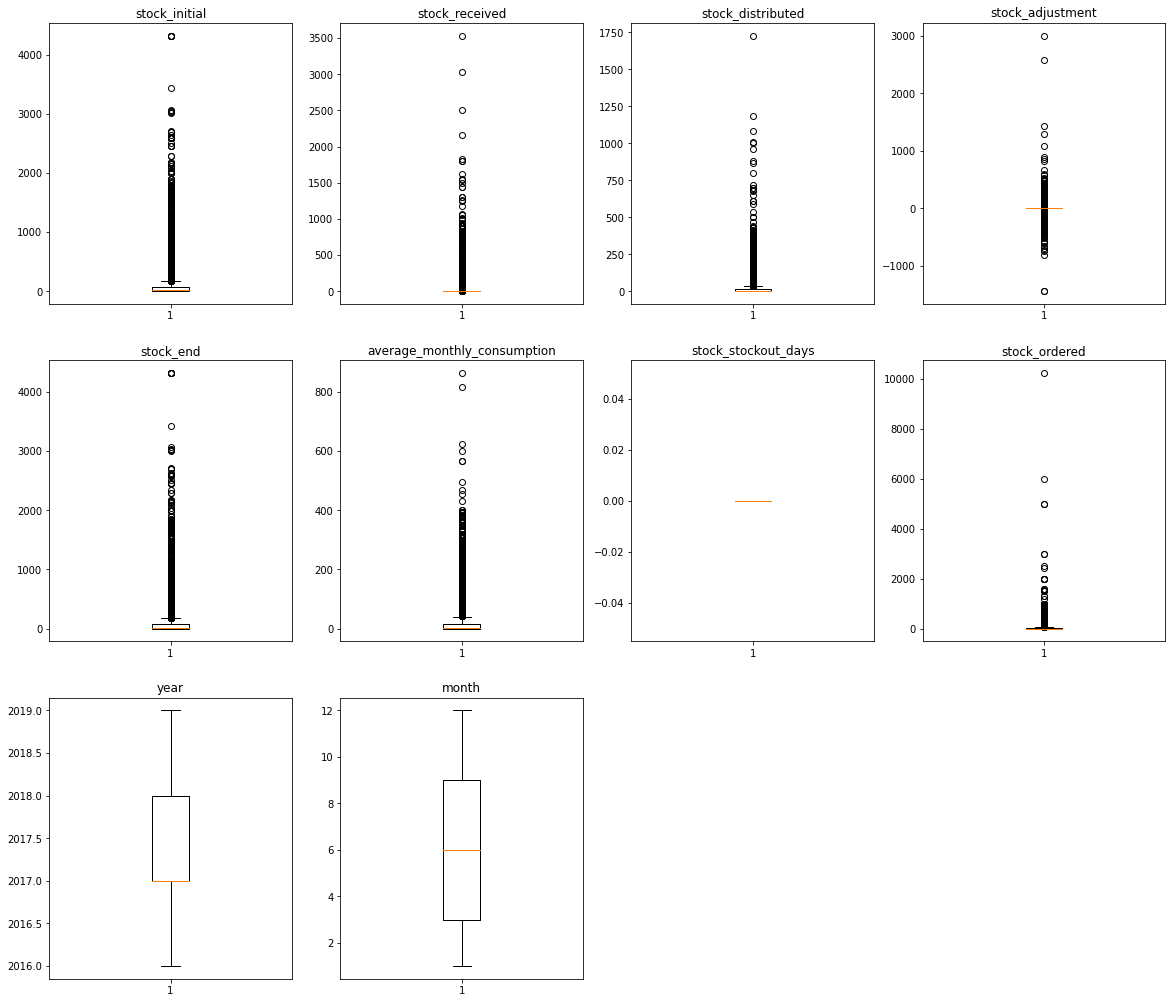

In [ ]:
#Checking for outliers 
Train_Numerics = {'stock_initial': 1, 'stock_received': 2, 'stock_distributed': 3,'stock_adjustment': 4,
              'stock_end': 5, 'average_monthly_consumption': 6, 'stock_stockout_days': 7,
              'stock_ordered': 8, 'year':9 ,'month':10}

plt.figure(figsize=(20,30))

#Visualizing the Information on a boxplot:
for variable,i in Train_Numerics.items():
  plt.subplot(5,4,i)
  plt.boxplot(train[variable])
  plt.title(variable)
plt.show()

#### Annual_cases

In [ ]:
# Determining the no. of records in our dataset(Train_data)
#
mon_data.shape

(678, 28)

In [ ]:
# Previewing the top of our dataset
#
mon_data.head()

,district,month,year,implant_women_old,implant_women_new,injection2_women_old,injection2_women_new,injection3_women_old,injection3_women_new,pill_women_old,pill_women_new,iud_women_old,iud_women_new,iud_number_dispensed,implant_number_dispensed,injection2_number_dispensed,injection3_number_dispensed,pill_number_dispensed,iud_number_received,implant_number_received,injection2_number_received,injection3_number_received,pill_number_received,iud_stock_end,implant_stock_end,injection2_stock_end,injection3_stock_end,pill_stock_end
0,ABENGOUROU,1,2019,478.0,91.0,103.0,17.0,1278,296,195.0,34.0,NaN,NaN,NaN,75.0,44.0,1082.0,2542.0,NaN,319.0,33.0,1244.0,2846.0,NaN,422.0,NaN,1501.0,3466.0
1,ABENGOUROU,2,2019,340.0,81.0,126.0,10.0,1237,253,187.0,19.0,9.0,1.0,1.0,66.0,38.0,813.0,557.0,20.0,255.0,17.0,1174.0,2608.0,NaN,394.0,NaN,1535.0,3327.0
2,ABENGOUROU,3,2019,367.0,59.0,14.0,7.0,1300,224,147.0,26.0,NaN,5.0,5.0,47.0,42.0,819.0,665.0,50.0,214.0,50.0,1050.0,2148.0,NaN,340.0,NaN,1187.0,3636.0
3,ABENGOUROU,4,2019,583.0,46.0,6.0,1.0,1296,336,200.0,35.0,NaN,3.0,1.0,36.0,66.0,874.0,404.0,45.0,217.0,55.0,824.0,1787.0,NaN,340.0,NaN,889.0,2727.0
4,ABENGOUROU,5,2019,407.0,60.0,46.0,20.0,1356,281,156.0,24.0,NaN,1.0,1.0,71.0,47.0,813.0,545.0,14.0,321.0,256.0,1032.0,1635.0,NaN,355.0,NaN,604.0,1668.0


In [ ]:
# Checking whether each column has an appropriate datatype
#
mon_data.dtypes

district                        object
month                            int64
year                             int64
implant_women_old              float64
implant_women_new              float64
injection2_women_old           float64
injection2_women_new           float64
injection3_women_old             int64
injection3_women_new             int64
pill_women_old                 float64
pill_women_new                 float64
iud_women_old                  float64
iud_women_new                  float64
iud_number_dispensed           float64
implant_number_dispensed       float64
injection2_number_dispensed    float64
injection3_number_dispensed    float64
pill_number_dispensed          float64
iud_number_received            float64
implant_number_received        float64
injection2_number_received     float64
injection3_number_received     float64
pill_number_received           float64
iud_stock_end                  float64
implant_stock_end              float64
injection2_stock_end     

In [ ]:
#Checking for duplicates 
mon_data.duplicated().sum()

0

In [ ]:
#Checking for missing values 
mon_data.isnull().sum().sort_values(ascending = False)

injection2_stock_end           678
iud_stock_end                  678
iud_number_dispensed           429
iud_women_old                  428
iud_women_new                  372
iud_number_received            344
injection2_women_new           197
injection2_number_received     182
injection2_number_dispensed    170
injection2_women_old           122
pill_women_new                  83
implant_women_old               68
pill_number_dispensed           63
pill_number_received            63
pill_women_old                  57
pill_stock_end                  52
implant_number_received         35
implant_stock_end               33
implant_number_dispensed        29
injection3_number_received      21
injection3_stock_end            19
injection3_number_dispensed     16
implant_women_new                6
month                            0
injection3_women_new             0
injection3_women_old             0
year                             0
district                         0
dtype: int64

#### Annual Dataset

In [ ]:
annual_data.head()

,Unnamed: 0,district,year,implant_women_old,implant_women_new,injection2_women_old,injection2_women_new,injection3_women_old,injection3_women_new,pill_women_old,pill_women_new,iud_women_old,iud_women_new,iud_number_dispensed,implant_number_dispensed,injection2_number_dispensed,injection3_number_dispensed,pill_number_dispensed,iud_number_received,implant_number_received,injection2_number_received,injection3_number_received,pill_number_received,iud_stock_end,implant_stock_end,injection2_stock_end,injection3_stock_end,pill_stock_end
0,0,ABENGOUROU,2018,3298.0,965.0,2997.0,749.0,10892,2609,1867.0,425.0,117.0,15.0,26.0,823.0,3681.0,7082.0,6893.0,673.0,2435.0,8799.0,12890.0,35961.0,NaN,3167.0,NaN,16041.0,48097.0
1,1,ABENGOUROU,2017,2597.0,698.0,2125.0,588.0,9939,2480,1835.0,400.0,34.0,22.0,15.0,483.0,2894.0,6460.0,6339.0,544.0,1760.0,9920.0,12727.0,31260.0,NaN,2617.0,NaN,16403.0,41079.0
2,2,ABENGOUROU,2016,865.0,408.0,2616.0,786.0,8407,2440,2675.0,439.0,20.0,24.0,19.0,438.0,3167.0,5394.0,5982.0,436.0,1503.0,11407.0,12666.0,28256.0,NaN,1671.0,NaN,8561.0,20878.0
3,3,ABOBO EST,2018,4041.0,2234.0,2200.0,583.0,13504,3940,2959.0,673.0,383.0,180.0,155.0,2372.0,878.0,9512.0,5234.0,1154.0,3309.0,2241.0,9914.0,7426.0,NaN,3092.0,NaN,9359.0,9046.0
4,4,ABOBO EST,2017,1954.0,2491.0,1768.0,214.0,10745,2389,3506.0,679.0,147.0,259.0,258.0,3066.0,1805.0,8939.0,6957.0,2780.0,4009.0,5846.0,11784.0,13191.0,NaN,2596.0,NaN,6359.0,11711.0


In [ ]:
#Checking for missing values 
annual_data.isnull().sum().sort_values(ascending = False)

injection2_stock_end           339
iud_stock_end                  339
iud_women_old                  127
iud_number_dispensed           106
iud_number_received             94
pill_stock_end                  73
implant_stock_end               73
injection3_stock_end            68
iud_women_new                   62
implant_women_old               13
injection2_number_received      11
injection2_number_dispensed      8
pill_number_received             7
implant_number_received          6
implant_number_dispensed         6
pill_number_dispensed            5
injection2_women_new             5
injection3_number_received       2
injection2_women_old             2
implant_women_new                2
injection3_number_dispensed      1
pill_women_new                   1
district                         0
pill_women_old                   0
injection3_women_new             0
injection3_women_old             0
year                             0
Unnamed: 0                       0
dtype: int64

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

## 5. Exploratory Analysis

### Univeriate Analysis

In [ ]:
#Duplicating train dataframe
train_eda = train

In [ ]:
train_eda['product_code'] = train_eda['product_code'].replace({'AS27134': 'Injectable Contraceptive(NORISTERAT)', 'AS17005': 'Female Condom', 'AS46000': 'Male Condom', 'AS27139': 'Emergency Contraceptive (Pill)', 'AS27137': 'Contraceptive Implant(JADELLE)', 'AS27138': 'Contraceptive Implant(IMPLANON)', 'AS21126': 'Injectable Contraceptive(MEDROXYPROGESTERONE)', 'AS27133': 'Injectable Contraceptive(DEPO PROVERA)', 'AS42018': 'Intrauterine Device (IUD)', 'AS27000': 'Oral Contraceptive Pill(MICROGYNON)', 'AS27132': 'Oral Contraceptive Pill(MICROLUT)'})

In [ ]:
#Statistical summary 
train_eda.describe()

,year,month,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
count,34990.000000,34990.000000,34990.000000,34990.000000,34990.000000,34990.000000,34990.000000,34990.000000,34990.0,34990.000000
mean,2017.444098,6.157073,63.360789,14.958131,14.892112,0.975336,64.402143,14.722006,0.0,26.658102
std,1.020275,3.433967,169.464370,71.062948,40.092218,38.135708,171.681322,32.724458,0.0,107.166082
min,2016.000000,1.000000,0.000000,0.000000,0.000000,-1440.000000,0.000000,0.000000,0.0,0.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,2017.000000,6.000000,12.000000,0.000000,1.000000,0.000000,13.000000,3.000000,0.0,0.000000
75%,2018.000000,9.000000,69.000000,0.000000,13.000000,0.000000,70.000000,16.000000,0.0,20.000000
max,2019.000000,12.000000,4320.000000,3534.000000,1728.000000,3003.000000,4320.000000,864.000000,0.0,10240.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


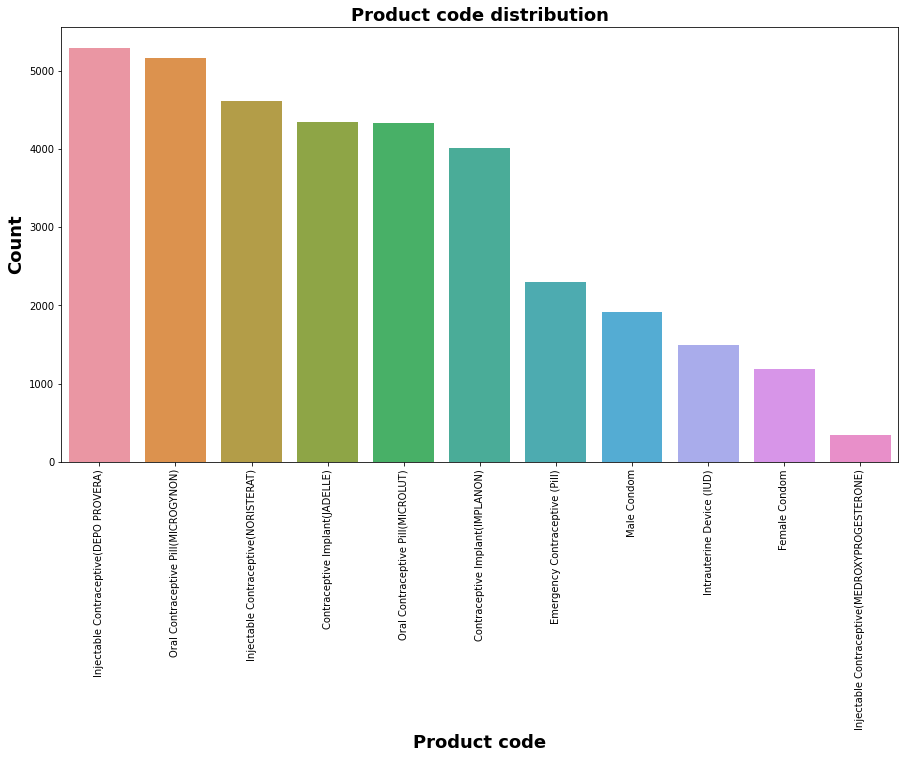

In [ ]:
#Plotting Products distribution
fontsize = 18
plt.figure(figsize=(15,8))
sns.countplot(train_eda['product_code'],data= train_eda, order = train_eda['product_code'].value_counts().index)
plt.title('Product code distribution',weight= 'bold',fontsize= fontsize)
plt.xlabel('Product code',weight='bold',fontsize= fontsize)
plt.ylabel('Count',weight='bold',fontsize= fontsize)
plt.xticks(rotation=90)
plt.show()

 * The most popular contraceptive is Injectable   Contraceptive(DEPO PROVERA) followed by Oral Contraceptive Pill(MICROGYNON)

 * The least popular contraceptive is Injectable Contraceptive(MEDROXYPROGESTERONE)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


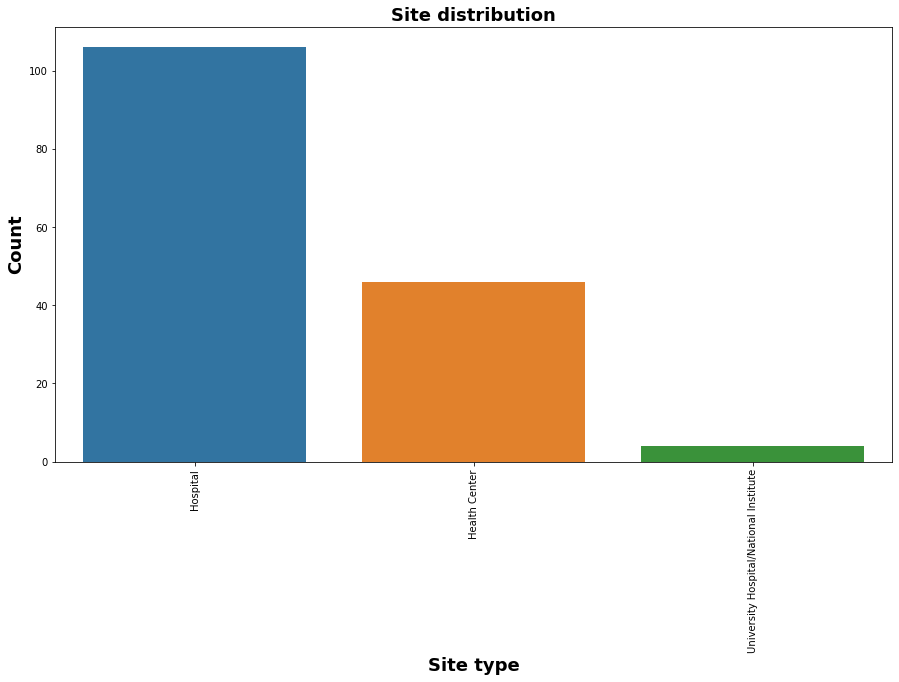

In [ ]:
#Plotting site ditribution 
fontsize = 18
plt.figure(figsize=(15,8))
sns.countplot(serv_data['site_type'],data= train_eda, order = serv_data['site_type'].value_counts().index)
plt.title('Site distribution',weight= 'bold',fontsize= fontsize)
plt.xlabel('Site type',weight = 'bold',fontsize= fontsize)
plt.ylabel('Count',weight='bold',fontsize= fontsize)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


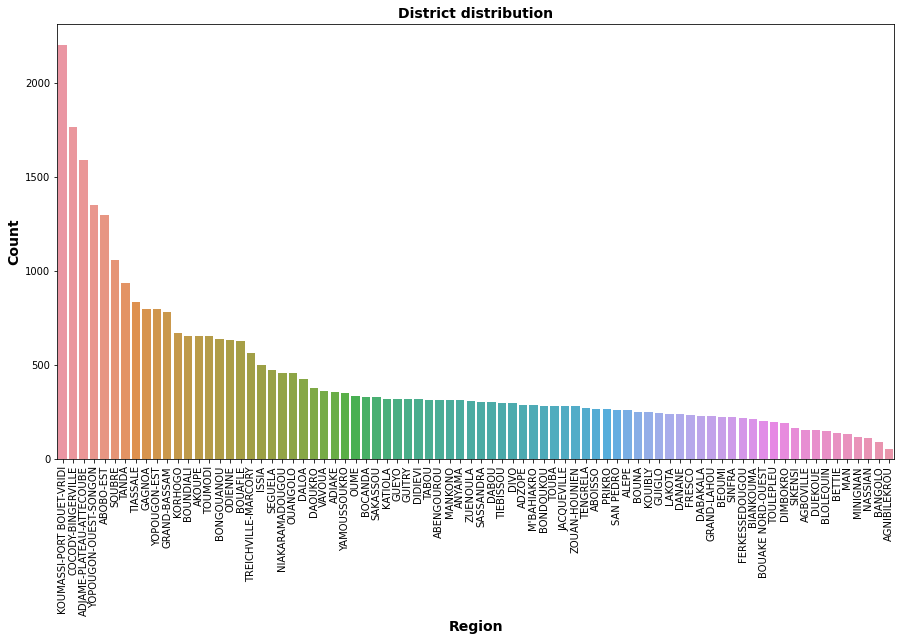

In [ ]:
#Plotting district ditribution 
fontsize = 14
plt.figure(figsize=(15,8))
sns.countplot(train_eda['district'],data= train_eda, order = train_eda['district'].value_counts().index)
plt.title('District distribution',weight= 'bold',fontsize= fontsize)
plt.xlabel('Region',weight = 'bold',fontsize= fontsize)
plt.ylabel('Count', weight = 'bold',fontsize= fontsize)
plt.xticks(rotation=90)
plt.show()

### Bivariate Analysis

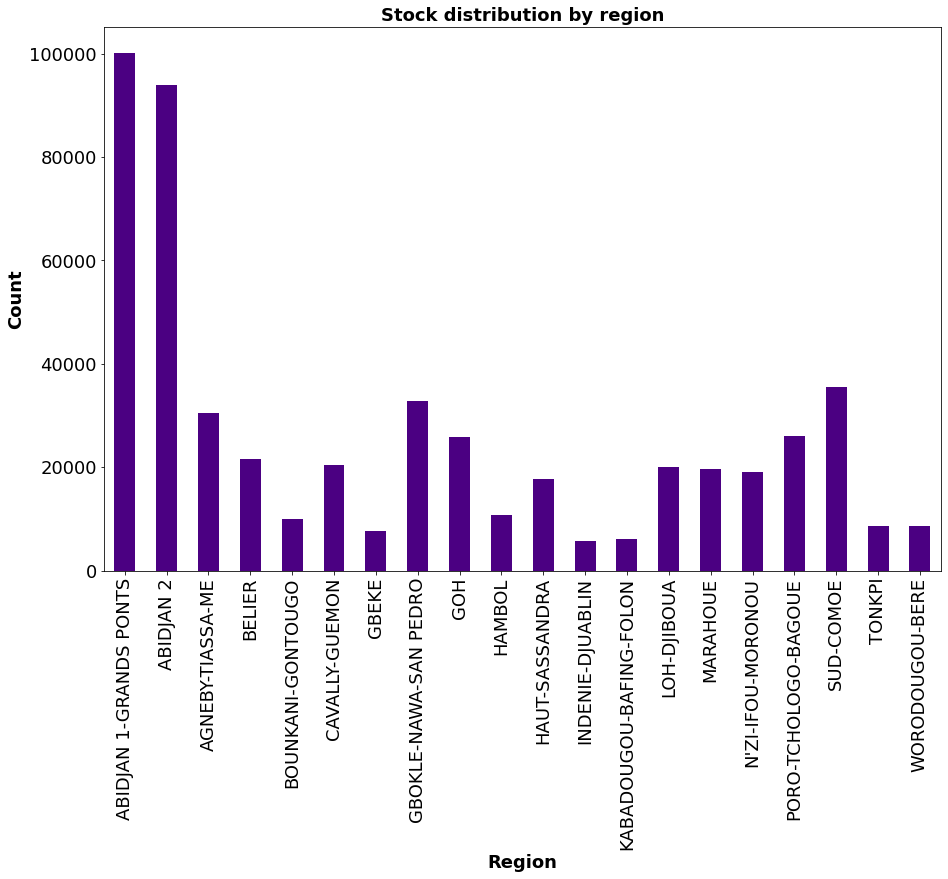

In [ ]:
#Plotting stock distribution by region
fontsize = 18
region = train.groupby('region')['stock_distributed'].sum()
region.plot(kind='bar', figsize=(15,10), color="indigo", fontsize= fontsize);
plt.title('Stock distribution by region' ,weight ='bold',fontsize= fontsize)
plt.xlabel('Region' ,weight='bold',fontsize= fontsize)
plt.ylabel('Count', weight= 'bold',fontsize= fontsize)
plt.show()

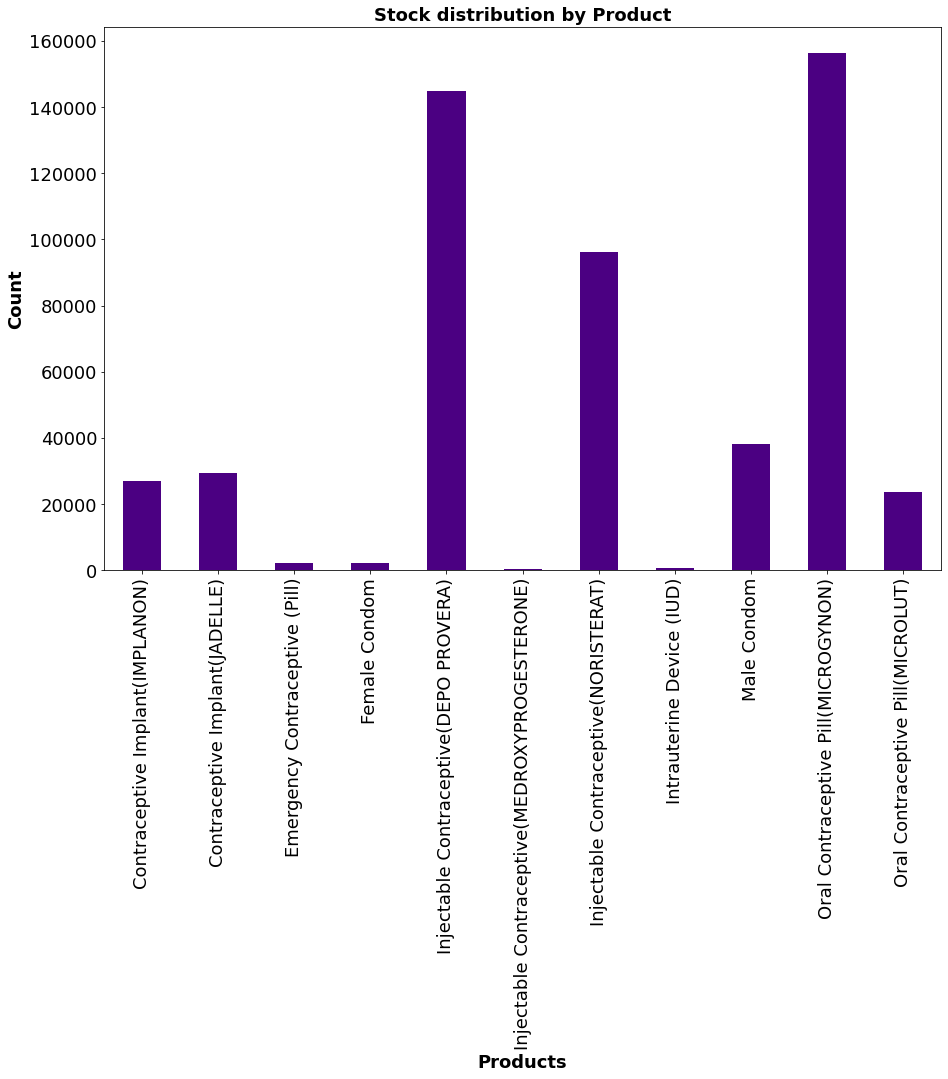

In [ ]:
#Plotting stock distribution by product code
fontsize = 18
region = train.groupby('product_code')['stock_distributed'].sum()
region.plot(kind='bar', figsize=(15,10), color="indigo", fontsize= fontsize);
plt.title('Stock distribution by Product' ,weight ='bold',fontsize= fontsize)
plt.xlabel('Products' ,weight='bold',fontsize= fontsize)
plt.ylabel('Count', weight= 'bold',fontsize= fontsize)
plt.show()

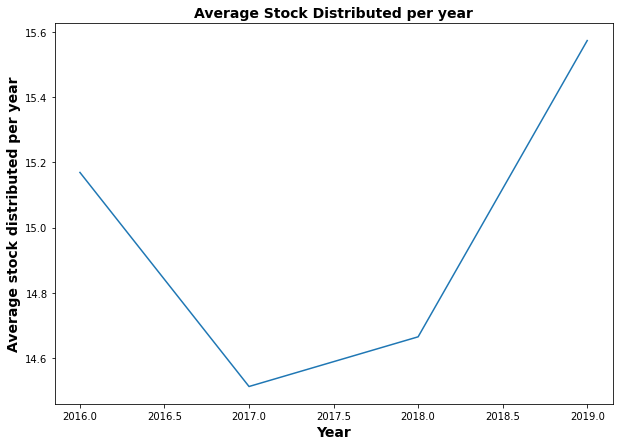

In [ ]:
#Plotting stock ditribution per year 
plt.figure(figsize=(10,7))
fontsize = 14
g = train_eda.groupby('year')['stock_distributed'].mean().reset_index(name = 'average stock distributed per year')
sns.lineplot(x = 'year', data = g, y='average stock distributed per year')
plt.title('Average Stock Distributed per year',weight ='bold',fontsize= fontsize)
plt.xlabel('Year',weight ='bold',fontsize= fontsize)
plt.ylabel('Average stock distributed per year',weight ='bold',fontsize= fontsize)
plt.show() 

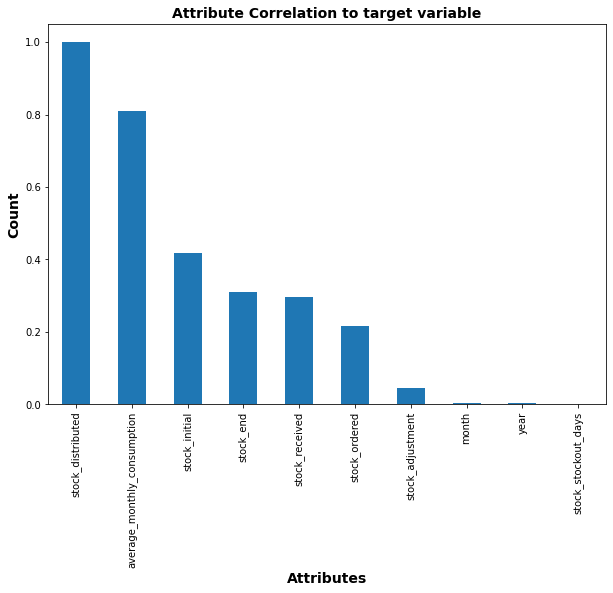

In [ ]:
#plotting attribute correlation to traget variable
fontsize = 14
figsize = [10,7]
correlation = train_eda.corr()
correlation['stock_distributed'].sort_values(ascending=False).plot(kind='bar',figsize=figsize)
plt.title('Attribute Correlation to target variable', weight ='bold',fontsize= fontsize)
plt.xlabel('Attributes',weight ='bold',fontsize= fontsize)
plt.ylabel('Count',weight ='bold',fontsize= fontsize)
plt.show()

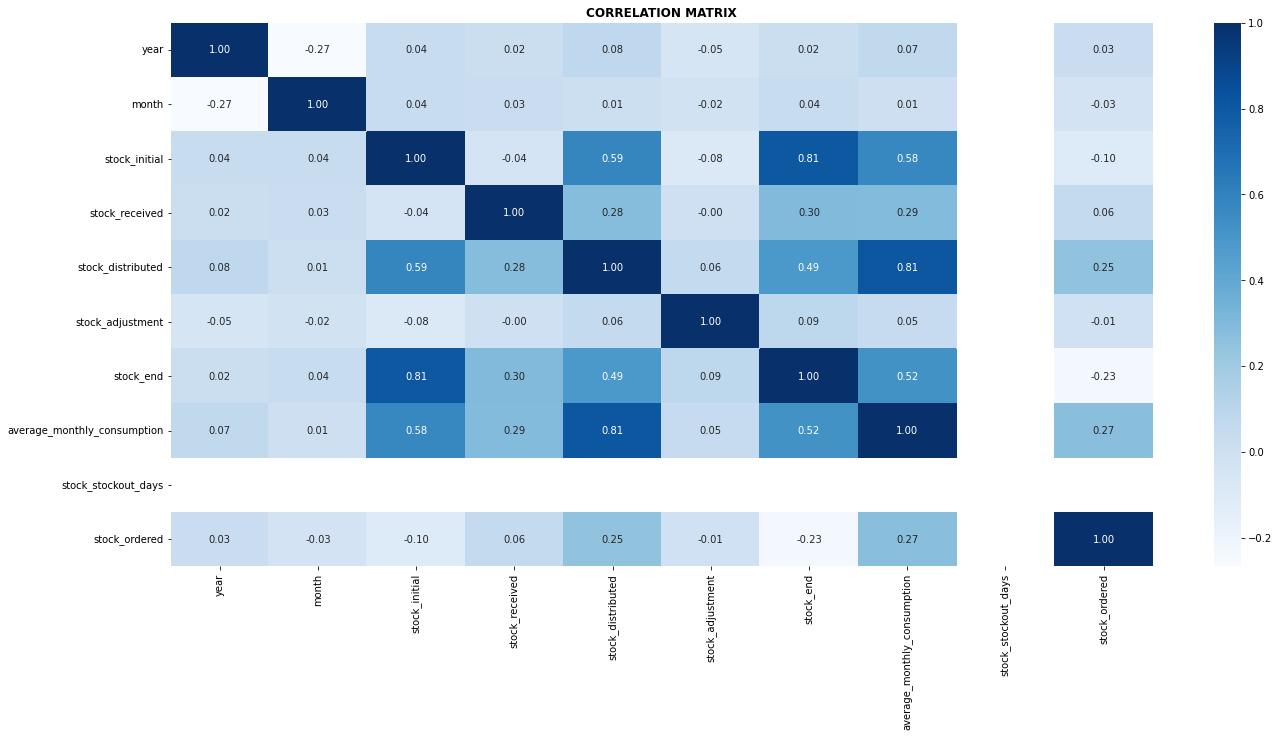

In [ ]:
#To check for correlation between the variables:
plt.figure(figsize = (22, 10))
corr = train_eda.corr(method = 'spearman')
sns.heatmap(corr, cmap = 'Blues', annot = True, fmt=".2f")
plt.title('CORRELATION MATRIX', y=1.5,weight='bold')
plt.show()

## 7. Implementing the Solution

In [ ]:
# Implementing the Solution
# 

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?